In [1]:
import numpy as np

np.random.seed(42)

# Linear Regression Intro

In [2]:

# generated data with noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

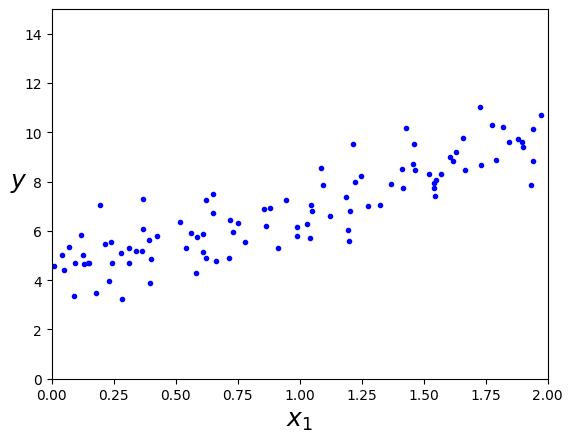

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add bias term x0 = 1 to each instance
# normal equation for parameter estimations -> computationally expensive for many features as inverse of matrix needs to be calculated = O(N^3)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance -> for + theta_0
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

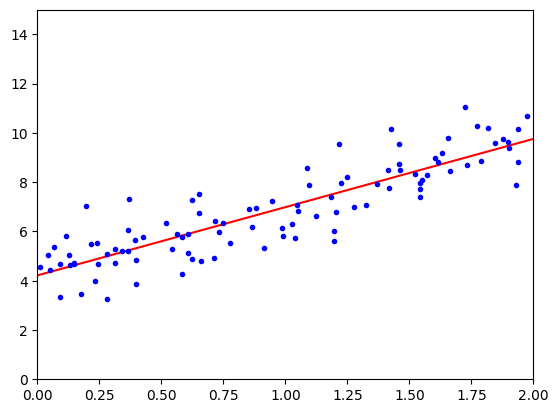

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# sklearn approach
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

In [9]:
# predict samples from above
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Linear Regression with Gradient Descent

In [10]:
eta = 0.1 # step width, learning rate
n_iterations = 1000
m = 100 # number of samples
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # vector of partial derivatives of each parameter
    theta = theta - eta * gradients # apply negative gradient on parameter to minimize cost function



In [11]:
theta

array([[4.21509616],
       [2.77011339]])

In [12]:
np.matmul(X_new_b, theta) # predict with matrix multiplication

array([[4.21509616],
       [9.75532293]])

In [13]:
# stochastic gradient descent -> faster, can escape local optima, wont achieve as good of a solution as batch approach

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # take random sample
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # calculate gradient for cost function based on one exaple
        eta = learning_schedule(epoch * m + i) # calculate learning rate based on time
        theta = theta - eta * gradients # apply gradient

In [14]:
theta

array([[4.18475289],
       [2.73036719]])

In [15]:
list(range(0, 100, 20))

[0, 20, 40, 60, 80]

In [16]:
# mini-batch gradient descent: closer to minima than SGD, harder to escape local minima, slower than SGD

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) # permute samples
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): # take batch_size samples
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # calculate 
        eta = learning_schedule(t)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.25214635],
       [2.7896408 ]])

# Polynomial Regression

In [18]:
# create non-linear samples

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

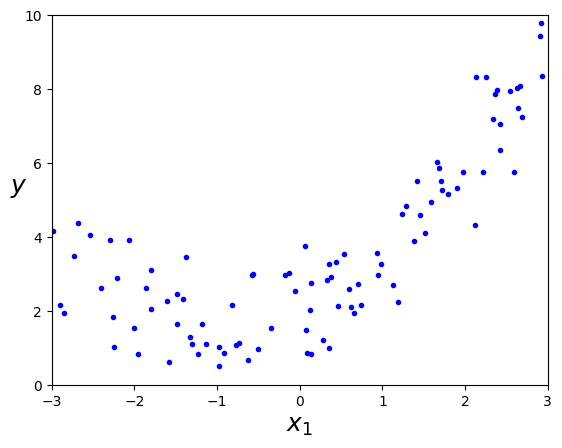

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # feature engineering of quadratic features, so linear model fits

In [21]:
X_poly[0] # 0th element: x, 1st element: x*x

array([2.38942838, 5.709368  ])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

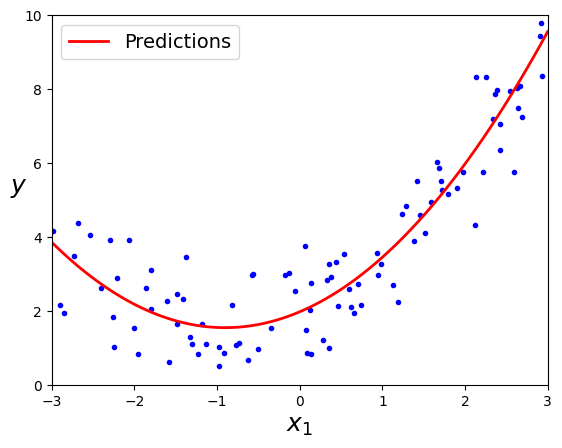

In [23]:
# use linear model to fit quadratic data -> polynomial features
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regularized Models (LASSO, Elastic, RIDGE)

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # trim parameters close to 0
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42) # l2 norm for ridge regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11111121])

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # trim parameters to 0 -> feature selection
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # ridge and lasso in one
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

# Logistic Regression (Classification based on Probability and Linear model)

In [28]:
from sklearn import datasets
iris = datasets.load_iris() # dataset to test logistic regression
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
# binary classification based on one feature
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

C:\Users\jacks\AppData\Local\Temp\ipykernel_292\1845393759.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

In [31]:
# binary classification based on two features
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) # multinominal to calculate 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

# Excercises
## 12. Batch Gradient Descent with early stopping for Softmax Regression

In [32]:
def softmax(scores):
    numerator = np.exp(scores)
    denominator = np.sum(numerator, keepdims=True)

    # return probabilities for each class by normalizing score for each classifier
    return numerator/denominator

In [33]:
def compute_scores(theta_set, sample):
    scores = []
    for thetas in theta_set:
        score = 0
        for theta, feature_val in zip(thetas, sample):
            score += theta*feature_val
        scores.append(score)
    return scores

In [47]:
def calculate_loss(y, y_hat_all):
    cost = 0
    # calculate errors for every sample and every classifier
    for y_curr, y_hat in zip(y, y_hat_all):
        curr_class = 0
        for y_hat_class in y_hat:
            y_k = 1 if y_curr == curr_class else 0
            if y_k == 0:
                continue
            cost += np.log10(y_hat_class)
            curr_class += 1
    return (-1.0/len(y_hat)) * cost

In [42]:
def calculate_gradient(y, X, y_hat_all, nr_parameters):
    curr_sample = 0
    # calculate errors for every sample and every classifier
    for y_curr, y_hat in zip(y, y_hat_all):
        errors = np.zeros([len(y), nr_parameters])
        curr_class = 0
        for y_hat_class in y_hat:
            y_k = 1 if y_curr == curr_class else 0
            errors[curr_sample, curr_class] = y_hat_class - y_k
            curr_class += 1
        curr_sample += 1
    return X.T.dot(errors)
    

In [57]:
epochs = 1000
classes = max(y) + 1
nr_features = len(X[0])

X_biased = np.c_[np.ones([len(X), 1]), X] # add one to each row for bias term

# init random parameters
theta_set = np.random.randn(classes, nr_features + 1)

learning_rate = 1e-2
loss = []

# optimize for amount of epochs
for epoch in range(0, epochs):
    # init #features*#classes matrix for predictions -> each row holds predictions for one sample
    y_hat_all = np.zeros([len(X), classes])
    # evaluate for each sample
    nr_sample = 0
    for sample in X_biased:
        # compute softmax scores: theta_k.T * x
        scores_for_sample = compute_scores(theta_set, sample)
        # normalize scores, so they can be interpreted as probabilities: exp(score_k)/sum_j_K(exp(s_j))
        probabilities_for_sample = softmax(scores_for_sample)
        # assign estimated probabilities to y_hat_all
        y_hat_all[nr_sample] = probabilities_for_sample
        nr_sample += 1

    # at this point all samples were predicted and are saved in y_hat_all
    # calculate loss and save in history so it can be plotted later
    cost = calculate_loss(y, y_hat_all)
    loss.append(cost)

    # calculate gradient based on labels y, samples X_biased, predictions y_hat_all and the number of model parameters for each classifier
    gradient = calculate_gradient(y, X_biased, y_hat_all, nr_features+1)
    theta_set = theta_set - learning_rate * gradient
        

Text(0, 0.5, 'Loss')

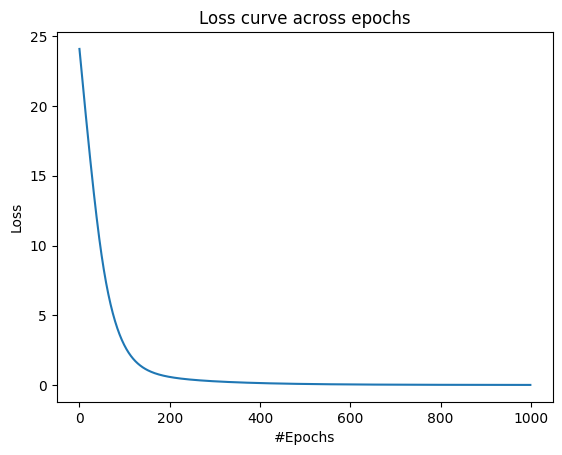

In [61]:
plt.plot(list(range(0, 1000)), loss)
plt.title('Loss curve across epochs')
plt.xlabel('#Epochs')
plt.ylabel('Loss')